In [24]:
#Oppgave 1: Skrap nettsiden og lagre i en dataramme

#Bruker nettside linken og BeautifulSoup til å finne tabellen som skal skrapes
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]


print(str(table_html)[:1000])

<table class="" style="">
<thead>
<tr>
<td>
                Modell (temp. varierte fra 0° til -10°)
                </td>
<td>
                WLTP-tall
                </td>
<td>
                STOPP
                </td>
<td>
                Avvik
                </td>
</tr>
</thead>
<tbody>
<tr><td>Tesla Model 3 LR Dual motor</td><td>614 km/14,7 kWh</td><td>521 km</td><td>-15,15 %</td></tr>
<tr><td>Mercedes-Benz EQS 580 4matic</td><td>645 km/18,3 kWh</td><td>513 km</td><td>-20,47 %</td></tr>
<tr><td>BMW iX xDrive50</td><td>591 km/21,4 kWh</td><td>503 km</td><td>-14,89 %</td></tr>
<tr><td>Tesla Model Y LR Dual motor</td><td>507 km/16,9 kWh</td><td>451 km</td><td>-11,05 %</td></tr>
<tr><td>Volkswagen ID.3 PRO S</td><td>539 km/16,3 kWh</td><td>435 km</td><td>-19,29 %</td></tr>
<tr><td>Kia EV6 2WD</td><td>528 km/16,5 kWh</td><td>429 km</td><td>-18,75 %</td></tr>
<tr><td>NIO ES8 LR 7-seter</td><td>488 km/21,5 kWh</td><td>425 km</td><td>-12,91 %</td></tr>
<tr><td>Kia EV6 4WD</td><td>484 

In [25]:
#Lagrer som en tabell 
def html_to_table(html):
    "Returns the table defined in html as a list"

    table=[]

    for row in html.find_all('tr'):
        r=[]

        cells=row.find_all('td')

        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        

        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        


    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

print(str(table)[:1000])

[['                Modell (temp. varierte fra 0° til -10°)                ', '                WLTP-tall                ', '                STOPP                ', '                Avvik                '], ['Tesla Model 3 LR Dual motor', '614 km/14,7 kWh', '521 km', '-15,15 %'], ['Mercedes-Benz EQS 580 4matic', '645 km/18,3 kWh', '513 km', '-20,47 %'], ['BMW iX xDrive50', '591 km/21,4 kWh', '503 km', '-14,89 %'], ['Tesla Model Y LR Dual motor', '507 km/16,9 kWh', '451 km', '-11,05 %'], ['Volkswagen ID.3 PRO S', '539 km/16,3 kWh', '435 km', '-19,29 %'], ['Kia EV6 2WD', '528 km/16,5 kWh', '429 km', '-18,75 %'], ['NIO ES8 LR 7-seter', '488 km/21,5 kWh', '425 km', '-12,91 %'], ['Kia EV6 4WD', '484 km/18,0 kWh', '423 km', '-12,60 %'], ['Volkswagen ID.4 Pro', '485 km/18,4 kWh', '414 km', '-14,64 %'], ['Hyundai Ioniq 5 2WD', '481 km/16,8 kWh', '408 km', '-15,18 %'], ['BMW i4 M50', '497 km/19,0 kWh', '406 km', '-18,31 %'], ['Skoda Enyaq iV80X', '477 km/18,2 kWh', '403 km', '-15,51 %'], ['Porsch

In [26]:
#Finner navn på kollonene
';'.join(table[0])

'                Modell (temp. varierte fra 0° til -10°)                ;                WLTP-tall                ;                STOPP                ;                Avvik                '

In [27]:
#Lagrer tabell som csv
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('Motor.csv',table)

In [28]:
#Laster inn csv
df = pd.read_csv('Motor.csv', delimiter=';', encoding='latin1', on_bad_lines='skip')

In [29]:
#Oppgave 2: vask dataen til en tabell med bare relevante tall og gode overskrifter. 

#Fjerner unødvendige str i dataene og splitter WLTP tall kolonnene i to
df[['WLTP-tall', 'Energibruk']] = df['                WLTP-tall                '].str.split('/', expand=True)
df.drop('                WLTP-tall                ', axis=1, inplace=True)

In [30]:
#Fjerner unødvendige str i dataene
df['WLTP-tall'] = df['WLTP-tall'].str.replace('km', '')
df['STOPP'] = df['                STOPP                '].str.replace('km', '')
df.drop('                STOPP                ', axis=1, inplace=True)
df

,Modell (temp. varierte fra 0Â° til -10Â°),Avvik,WLTP-tall,Energibruk,STOPP
0,Tesla Model 3 LR Dual motor,"-15,15 %",614,"14,7 kWh",521
1,Mercedes-Benz EQS 580 4matic,"-20,47 %",645,"18,3 kWh",513
2,BMW iX xDrive50,"-14,89 %",591,"21,4 kWh",503
3,Tesla Model Y LR Dual motor,"-11,05 %",507,"16,9 kWh",451
4,Volkswagen ID.3 PRO S,"-19,29 %",539,"16,3 kWh",435
5,Kia EV6 2WD,"-18,75 %",528,"16,5 kWh",429
6,NIO ES8 LR 7-seter,"-12,91 %",488,"21,5 kWh",425
7,Kia EV6 4WD,"-12,60 %",484,"18,0 kWh",423
8,Volkswagen ID.4 Pro,"-14,64 %",485,"18,4 kWh",414
9,Hyundai Ioniq 5 2WD,"-15,18 %",481,"16,8 kWh",408


In [31]:
#Fjerner radene uten nødvendige data
df = df[~df['WLTP-tall'].str.contains('x')]
df = df[~df['STOPP'].str.contains('x')]
df['WLTP-tall'] = df['WLTP-tall'].astype(float)
df['STOPP'] = df['STOPP'].astype(float)
df = df[df['WLTP-tall'] > 0]
df = df[df['STOPP'] > 0]


In [32]:
df1 = df

In [33]:
#Oppgave 3: Lag en regresjonsmodell av typen 𝑓(𝑥) = 𝑎𝑥 + 𝑏
x=pd.DataFrame(df['WLTP-tall'])
y=df['STOPP']
x['intercept']=1
x

,WLTP-tall,intercept
0,614.0,1
1,645.0,1
2,591.0,1
3,507.0,1
4,539.0,1
5,528.0,1
6,488.0,1
7,484.0,1
8,485.0,1
9,481.0,1


In [34]:
#Estimerer intercept og WLTP-tall verdiene
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

res.params

In [36]:
#Finner regresjonslinjen
import numpy as np
x=np.linspace(min(df['WLTP-tall']), max(df['WLTP-tall']), 100)

regression_line=res.params['intercept']+res.params['WLTP-tall']*x

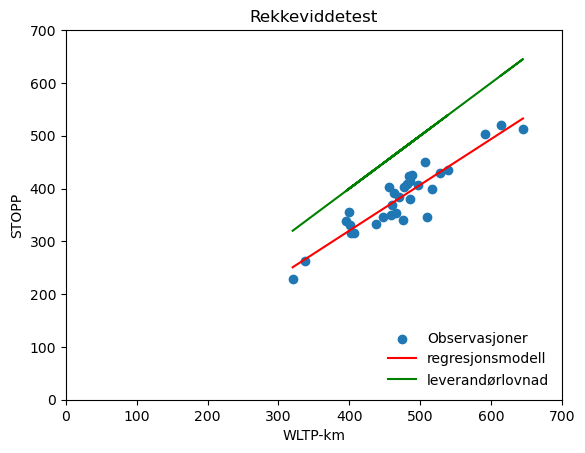

In [37]:
#pPlotter 
fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('STOPP')
ax.set_xlabel('WLTP-km')
ax.set_xlim([0, 700])
ax.set_ylim([0, 700])
ax.set_title("Rekkeviddetest")
#plotting the function:
ax.scatter(df['WLTP-tall'], df['STOPP'],  label='Observasjoner')
ax.plot(x, regression_line,color='red', label='regresjonsmodell')
ax.plot(df["WLTP-tall"], df["WLTP-tall"],color='green',label='leverandørlovnad')
ax.legend(loc='lower right',frameon=False)